In [7]:
import yfinance as yf
import pandas as pd

# Define the tickers for the assets we need
tickers = ['TSLA', 'BND', 'SPY']

# Set the start and end dates for our data
start_date = '2015-07-01'
end_date = '2025-07-31'

# Fetch the data using yfinance
data = yf.download(tickers, start=start_date, end=end_date, timeout=10)

print("✅ Data downloaded successfully!")

# Verify the first few rows
print("\n--- First 5 Rows ---")
print(data.head())

# Verify the last few rows
print("\n--- Last 5 Rows ---")
print(data.tail())

/tmp/ipykernel_60060/120464032.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date, timeout=10)
[*********************100%***********************]  3 of 3 completed

✅ Data downloaded successfully!

--- First 5 Rows ---
Price           Close                              High              \
Ticker            BND         SPY       TSLA        BND         SPY   
Date                                                                  
2015-07-01  60.816738  174.917145  17.943333  60.914464  175.363920   
2015-07-02  60.967075  174.756943  18.667999  61.027217  175.566203   
2015-07-06  61.177544  174.259583  18.648001  61.222653  175.043542   
2015-07-07  61.237705  175.355484  17.858667  61.470746  175.481925   
2015-07-08  61.410622  172.413483  16.997334  61.463244  174.293311   

Price                        Low                              Open  \
Ticker           TSLA        BND         SPY       TSLA        BND   
Date                                                                 
2015-07-01  18.174667  60.764116  174.124747  17.856667  60.794186   
2015-07-02  18.830000  60.937005  174.335456  18.220667  60.937005   
2015-07-06  18.779333  61.0

In [11]:
# Assuming 'data' is the DataFrame from the previous step

# 1. Simplify the DataFrame to only include 'Close'
close_df = data['Close']
print("--- Simplified DataFrame with Closing Prices ---")
print(close_df.head())

# 2. Check for any missing values (NaNs)
print("\n--- Initial Check for Missing Values ---")
print(close_df.isnull().sum())

# 3. Handle missing values using forward-fill
# This propagates the last valid observation forward. It's a good choice for
# time series data as it assumes the value remains the same on non-trading days.
close_df = close_df.ffill()

# 4. Verify that all missing values have been handled
print("\n--- Verification after Handling Missing Values ---")
print(close_df.isnull().sum())

--- Simplified DataFrame with Closing Prices ---
Ticker            BND         SPY       TSLA
Date                                        
2015-07-01  60.816738  174.917145  17.943333
2015-07-02  60.967075  174.756943  18.667999
2015-07-06  61.177544  174.259583  18.648001
2015-07-07  61.237705  175.355484  17.858667
2015-07-08  61.410622  172.413483  16.997334

--- Initial Check for Missing Values ---
Ticker
BND     0
SPY     0
TSLA    0
dtype: int64

--- Verification after Handling Missing Values ---
Ticker
BND     0
SPY     0
TSLA    0
dtype: int64


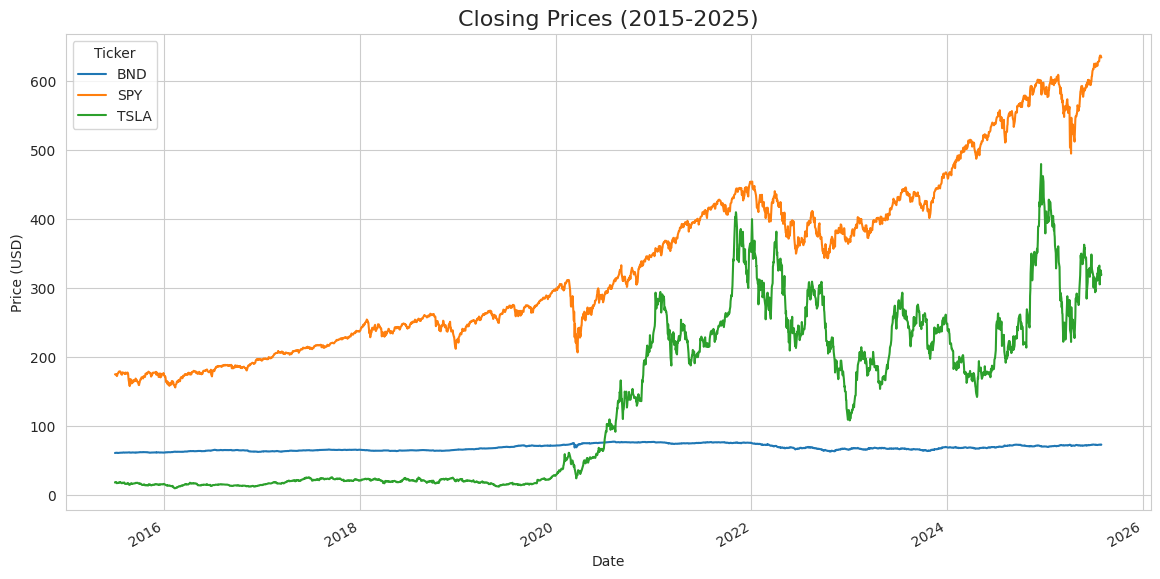

In [12]:
# Assuming 'close_df' is your cleaned DataFrame from the previous step
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style for the plots
sns.set_style('whitegrid')
plt.figure(figsize=(14, 7))

# Plot the closing prices for each asset
close_df.plot(ax=plt.gca())

# Add titles and labels for clarity
plt.title('Closing Prices (2015-2025)', fontsize=16)
plt.ylabel('Price (USD)')
plt.xlabel('Date')
plt.legend(title='Ticker')
plt.show()

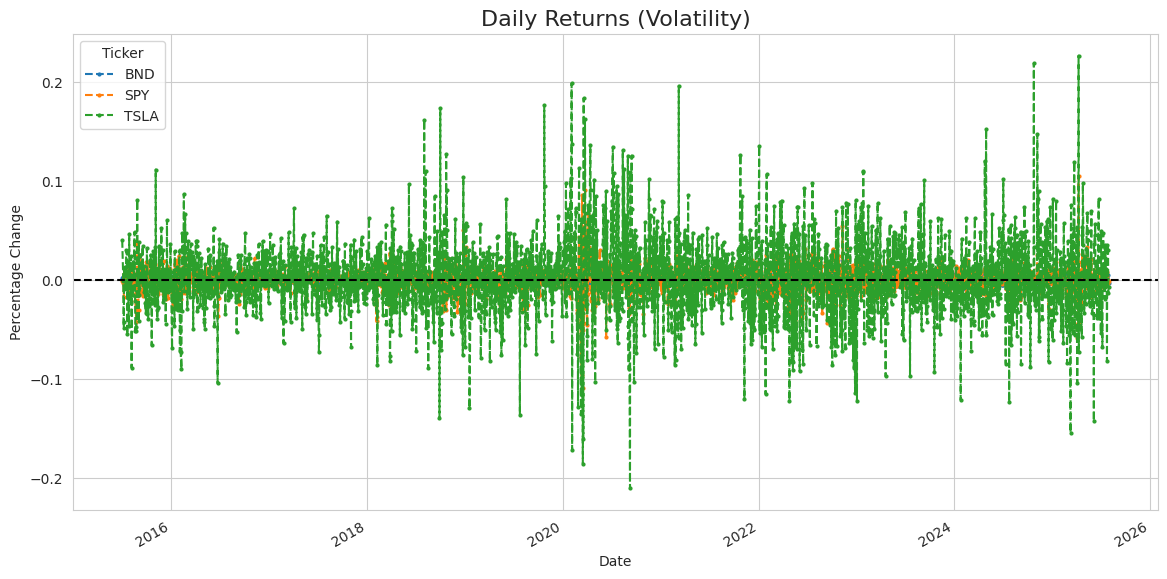

In [17]:
# Calculate daily percentage returns
daily_returns = close_df.pct_change().dropna()

# Plot the daily returns
daily_returns.plot(figsize=(14, 7), legend=True, linestyle='--', marker='o', ms=2)

plt.title('Daily Returns (Volatility)', fontsize=16)
plt.ylabel('Percentage Change')
plt.xlabel('Date')
plt.axhline(0, color='black', linestyle='--') # Add a line at zero
plt.show()

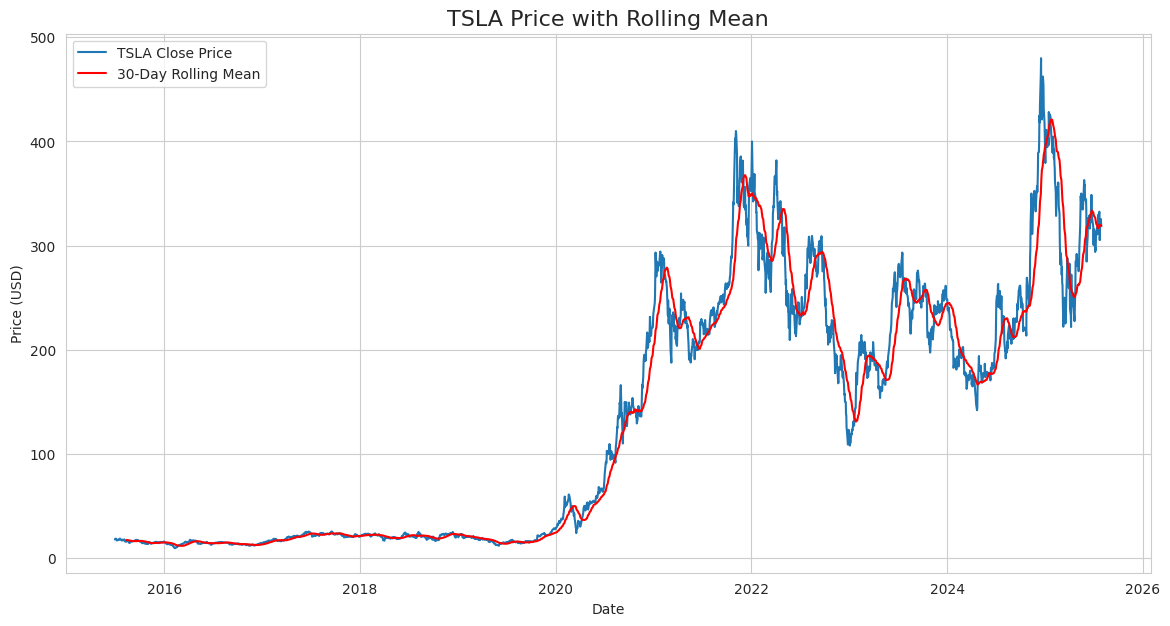

In [18]:
# Set the window for the rolling statistics (e.g., 30 days)
rolling_window = 30

# Calculate rolling mean and standard deviation for TSLA
rolling_mean_tsla = close_df['TSLA'].rolling(window=rolling_window).mean()
rolling_std_tsla = close_df['TSLA'].rolling(window=rolling_window).std()

# Plot the original price and the rolling mean
plt.figure(figsize=(14, 7))
plt.plot(close_df['TSLA'], label='TSLA Close Price')
plt.plot(rolling_mean_tsla, label=f'{rolling_window}-Day Rolling Mean', color='red')
plt.title('TSLA Price with Rolling Mean', fontsize=16)
plt.ylabel('Price (USD)')
plt.xlabel('Date')
plt.legend()
plt.show()
